# Clasificación K-nearest neighbor

### Importamos paquetes y conjunto de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.testing as tm
%matplotlib inline

df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/Classified_Data.txt",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [3]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [4]:
num_cols = df.columns.drop('TARGET CLASS')
Q01 = df[num_cols].quantile(0.01)
Q99 = df[num_cols].quantile(0.99)
df[num_cols] = df[num_cols].clip(Q01, Q99, axis=1)

### Verificamos la extensión de las características

In [5]:
l=list(df.columns)
l[0:len(l)-2]

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE']

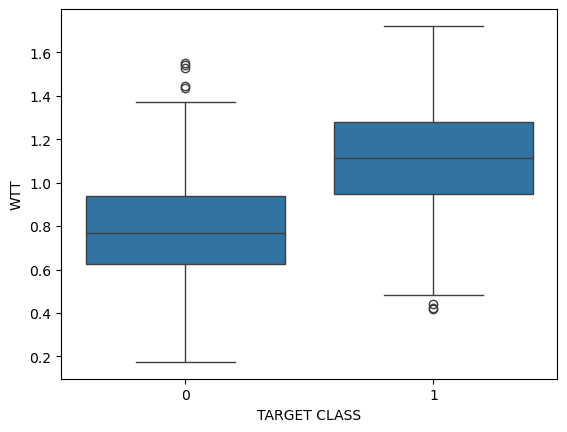

<Figure size 640x480 with 0 Axes>

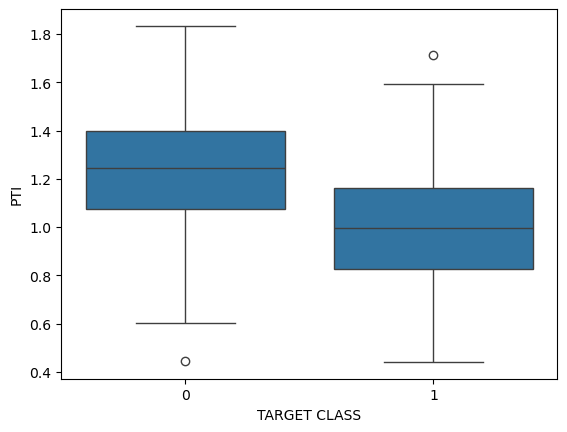

<Figure size 640x480 with 0 Axes>

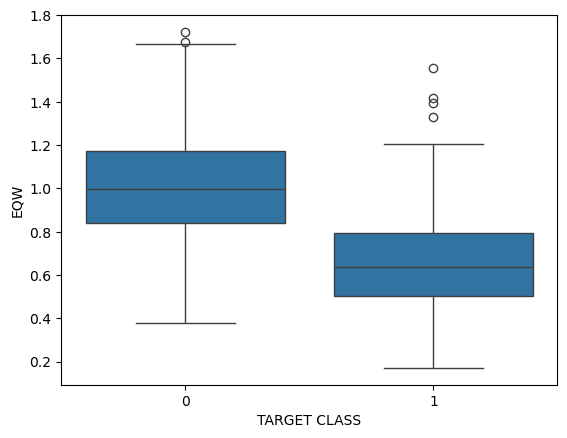

<Figure size 640x480 with 0 Axes>

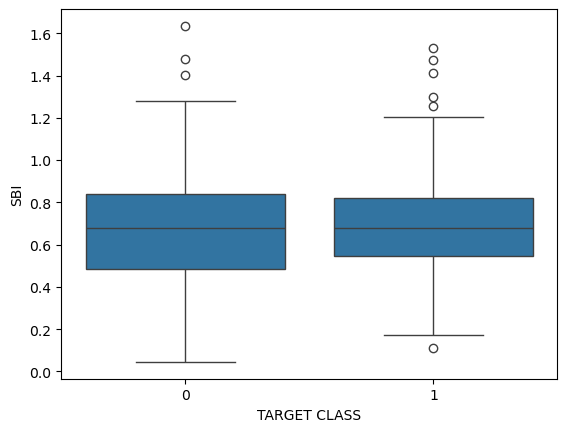

<Figure size 640x480 with 0 Axes>

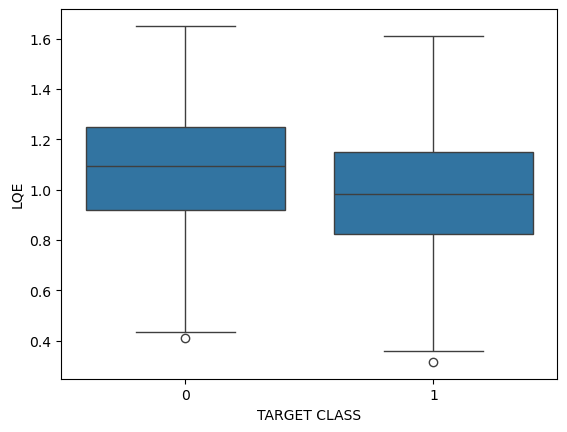

<Figure size 640x480 with 0 Axes>

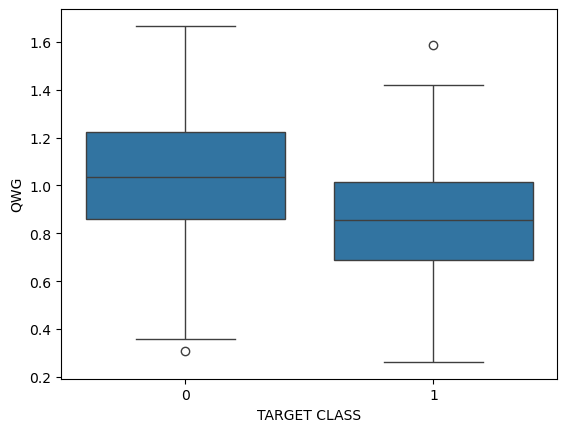

<Figure size 640x480 with 0 Axes>

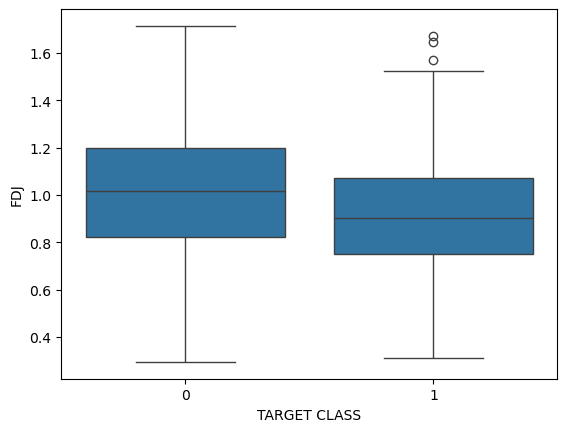

<Figure size 640x480 with 0 Axes>

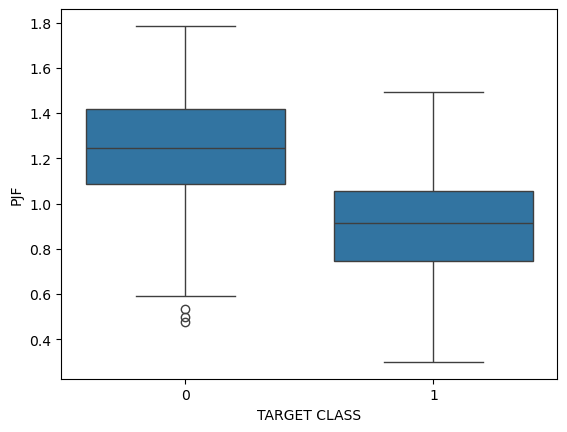

<Figure size 640x480 with 0 Axes>

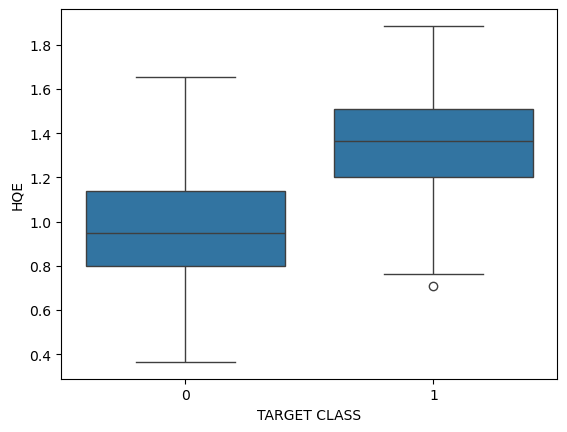

<Figure size 640x480 with 0 Axes>

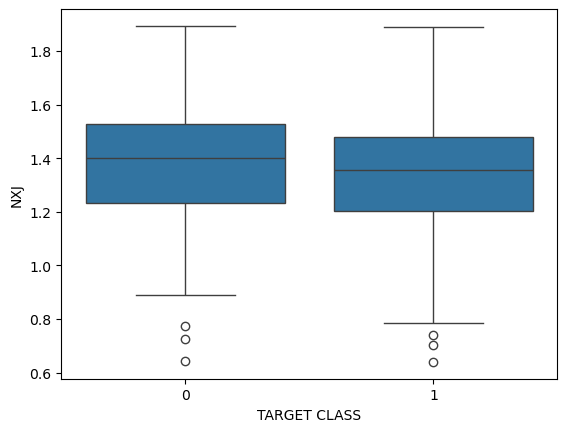

<Figure size 640x480 with 0 Axes>

In [44]:
for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.figure()
    plt.show()

### Escalamos las características usando el paquete sklearn.preprocessing

**Creamos una instancia de un estimador standardizing scaler**

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))

In [47]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### División de Entrenamiento/Prueba, ajuste de modelo y predicción

In [48]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=101
)

In [50]:
param_grid = {
    "n_neighbors": list(range(1, 61, 2)),
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

In [51]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 3, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,43


In [52]:
best_knn = gs.best_estimator_
print("Parámetros:", gs.best_params_)
print("Accuracy CV (media):", round(gs.best_score_, 3))

Parámetros: {'n_neighbors': 43, 'p': 2, 'weights': 'distance'}
Accuracy CV (media): 0.936


### Validación de resultados

**Evaluación en el test**

In [53]:
pred = best_knn.predict(X_test)

In [54]:
print("\nAccuracy test:", round(accuracy_score(y_test, pred), 3))
print("\nClassification report:\n", classification_report(y_test, pred))


Accuracy test: 0.948

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.94      0.96      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [55]:
print("Tasa de error:", round(np.mean(pred != y_test), 3))

Tasa de error: 0.052


**Matriz de confusión**

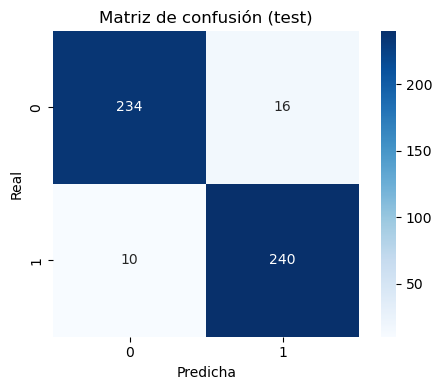

In [56]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title("Matriz de confusión (test)")
plt.ylabel('Real')
plt.xlabel('Predicha')
plt.tight_layout()
plt.show()

**Elbow con validación cruzada**

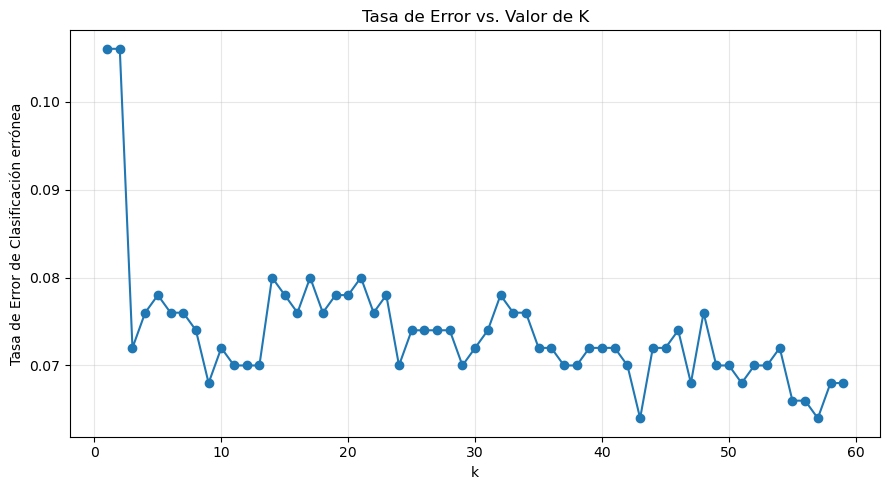

In [57]:
error_rate = []
K = range(1, 60)
for k in K:
    knn_i = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    scores = cross_val_score(knn_i, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    error_rate.append(1 - scores.mean())

plt.figure(figsize=(9,5))
plt.plot(K, error_rate, marker='o')
plt.title("Tasa de Error vs. Valor de K")
plt.xlabel('k')
plt.ylabel('Tasa de Error de Clasificación errónea')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()